# Logistic Regression

Logistic regression is a statistical technique for creating machine learning models with a binary 
dependent variable. In this notebook we are going to predict loan uusing this technique.

In [16]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [17]:
df = pd.read_csv("loanfile.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.shape

(614, 13)

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data cleaning

In [20]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())


In [21]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [43]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married              542
Dependents             0
Education            117
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(542, 13)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

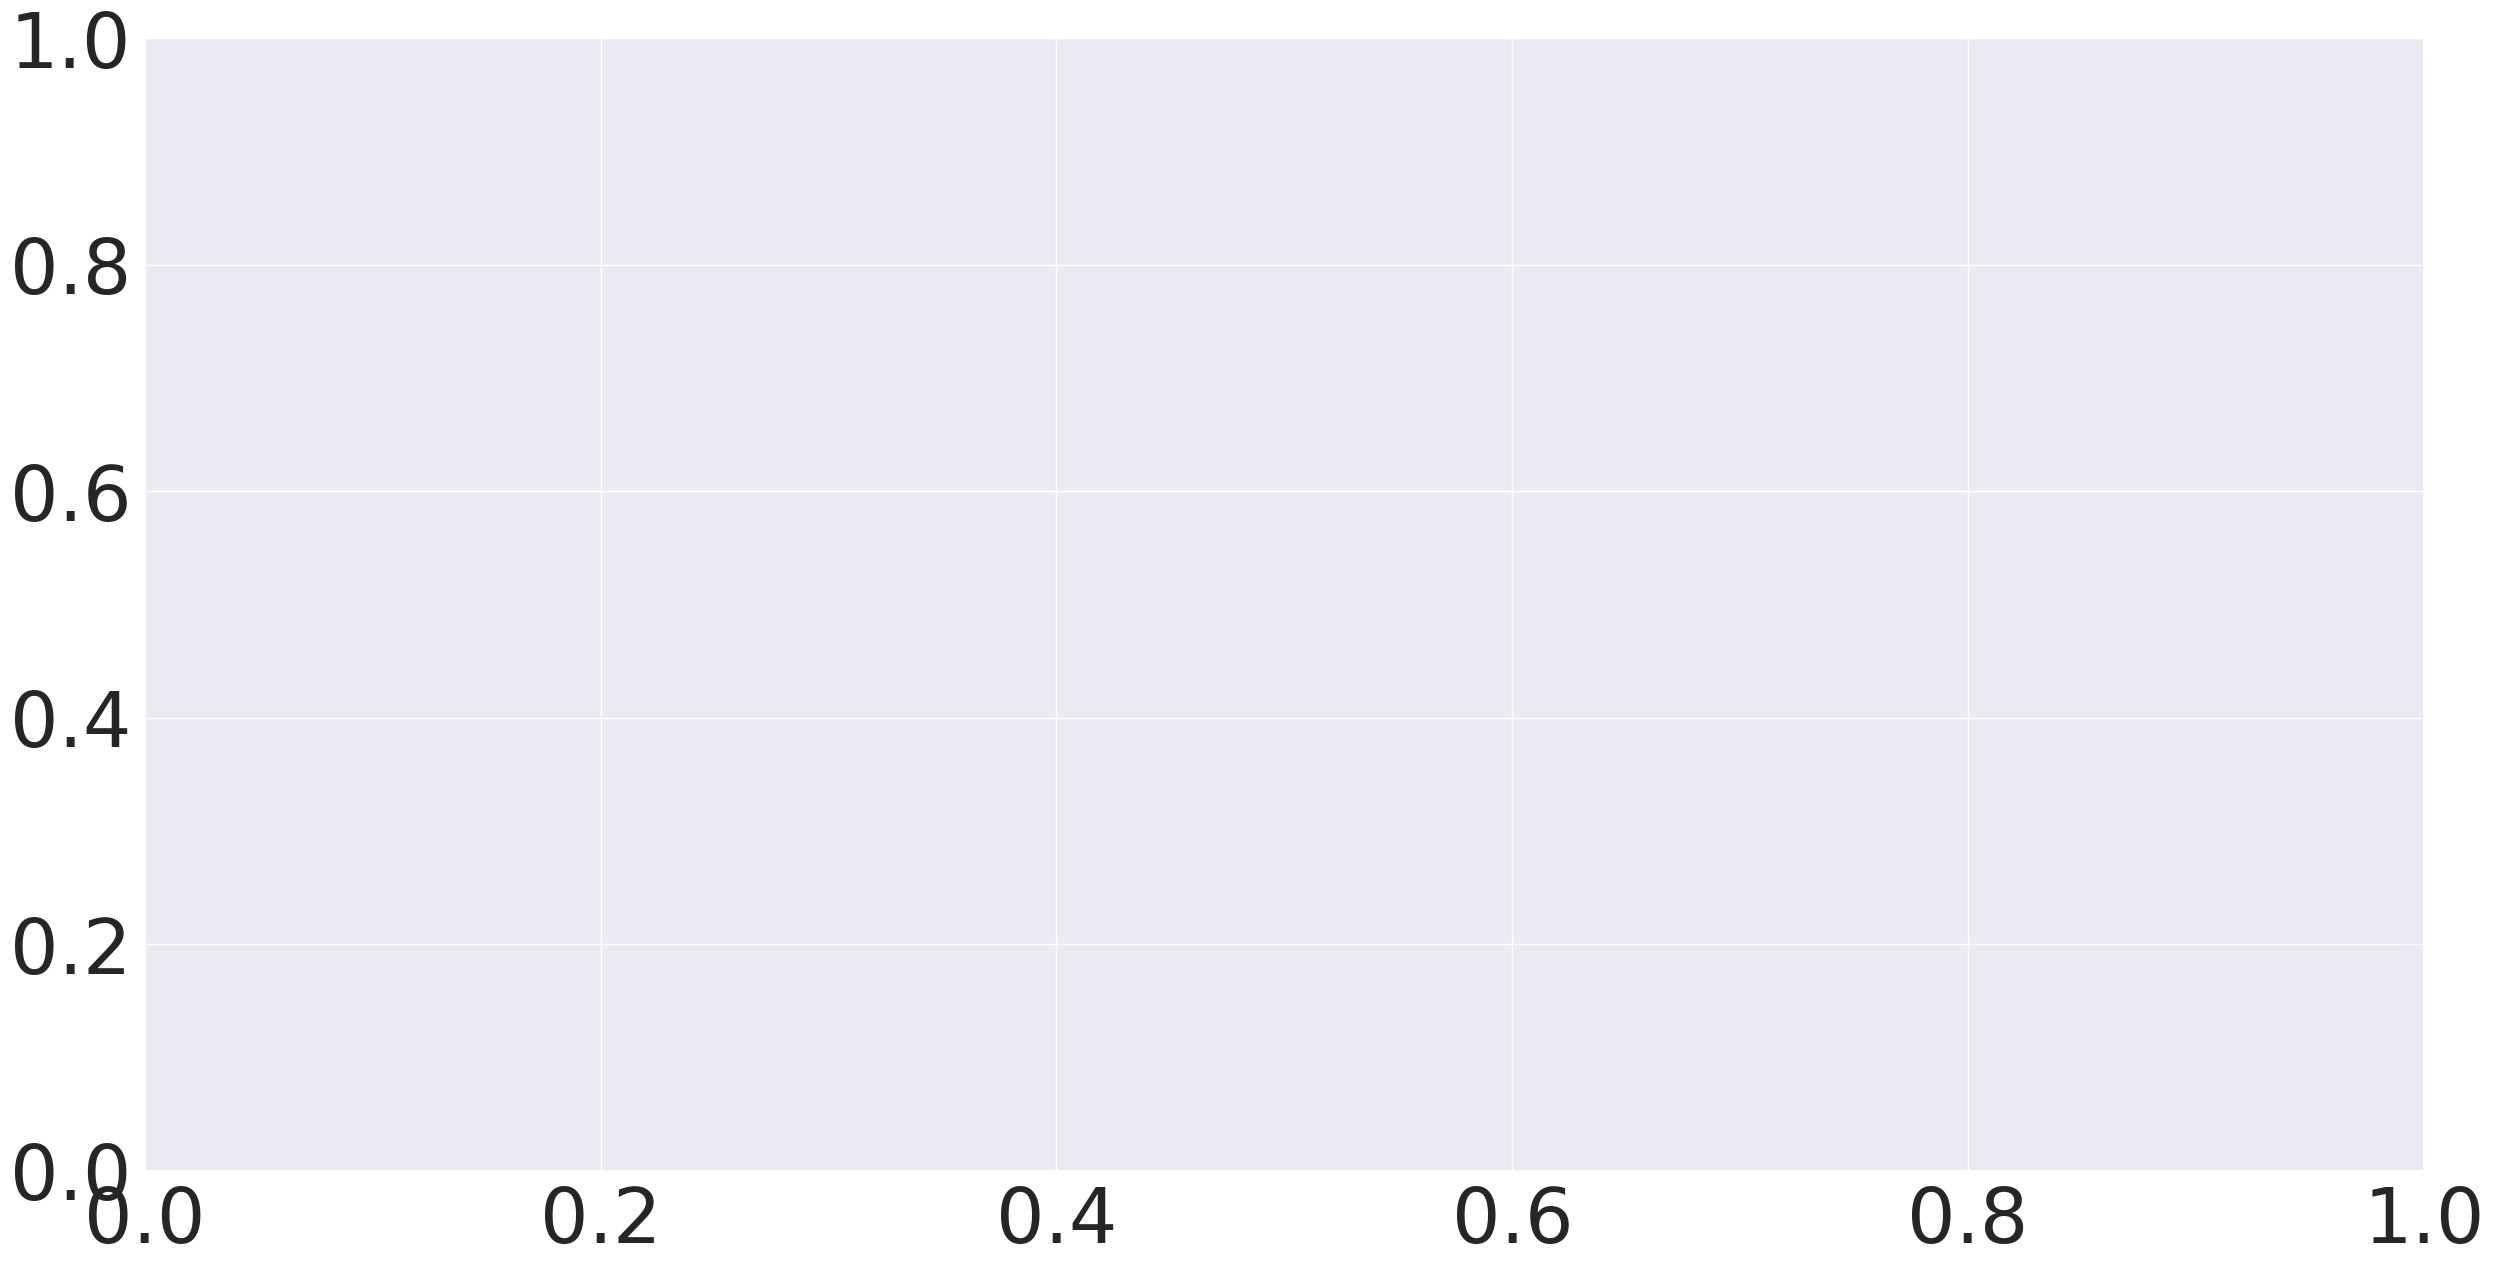

In [25]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'], hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'], hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'], hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])

In [26]:
df['Loan_Status'].replace('Y', 1, inplace = True)
df['Loan_Status'].replace('N',0, inplace= True)

In [27]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [28]:
df.Gender=df.Gender.map({'Male':1, 'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [40]:
df.Married= df.Married.map({'Yes':1, 'No':0})
df['Married'].value_counts()

Series([], Name: count, dtype: int64)

In [31]:
df.Dependents= df.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [32]:
df.Education= df.Education.map({'Graduate':1, 'No Graduate':0})
df['Education'].value_counts()

Education
1.0    425
Name: count, dtype: int64

In [33]:
df.Self_Employed= df.Self_Employed.map({'Yes':1, 'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [34]:
df.Property_Area= df.Property_Area.map({'Urban':2, 'Rural':0, 'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [36]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
145.000000     1
61.000000      1
146.000000     1
267.000000     1
119.000000     1
Name: count, Length: 195, dtype: int64

In [37]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [38]:
df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,NaN,0,1.0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,NaN,1,1.0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,NaN,0,1.0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,NaN,0,NaN,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,NaN,0,1.0,0,6000,0.0,141.000000,360.0,1.0,2,1
